<a href="https://colab.research.google.com/github/BLOOSALMON/My_Real_Projrct/blob/main/s%26p_500_w%EC%A7%80%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파일 로딩


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sp-500-stocks


In [ ]:
import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sp-500-stocks/.nfs0000000021f5e5cc00000119
/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [ ]:
import pandas as pd
import numpy as np

data_stocks = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_stocks.csv")
data_companies = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_companies.csv")
data_index = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_index.csv")

data_stocks.head(10)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-01-11,MMM,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-12,MMM,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-01-13,MMM,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-01-14,MMM,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-01-15,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB


In [ ]:
data_stocks.isnull().sum()

,0
Date,0
Symbol,0
Adj Close,1273705
Close,1273705
High,1273705
Low,1273705
Open,1273705
Volume,1273705


In [ ]:
data_stocks.replace("null", pd.NA, inplace = True) # 숫자형으로 바꿈

numeric_columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
data_stocks[numeric_columns]= data_stocks[numeric_columns].apply(pd.to_numeric, errors='coerce') # non_numeric to NAN, coerce 가 NAN으로 바꾸는 것
# cf) NAN은 숫자형 결측치에 사용
data_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1891531,2024-12-16,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1891532,2024-12-17,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1891533,2024-12-18,ZTS,NaN,NaN,NaN,NaN,NaN,NaN
1891534,2024-12-19,ZTS,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cutoff_date = pd.to_datetime("2014-12-22")
dt_stocks = data_stocks[pd.to_datetime(data_stocks["Date"]) > cutoff_date]
dt_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1252,2014-12-23,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1253,2014-12-24,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1254,2014-12-26,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1255,2014-12-29,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1256,2014-12-30,MMM,NaN,NaN,NaN,NaN,NaN,NaN


missing data


In [ ]:
# fill missing value
numeric_cols = data_stocks.select_dtypes(include = "number").columns
data_stocks[numeric_cols] = data_stocks[numeric_cols].fillna(data_stocks[numeric_cols].mean())

In [ ]:

last_day_s = data_stocks.iloc[-1]["Date"]
last_day_s

'2024-12-20'

In [ ]:
data_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [ ]:
data_index.head()
last_day = data_index.iloc[-1]["Date"]
last_day

'2024-12-20'

In [ ]:
df = pd.read_csv("/kaggle/input/sp-500-stocks/sp500_index.csv", parse_dates=["Date"])

df = df.rename(columns={"S&P500": "Price"})

df = df.set_index("Date")

df = df.to_period("D")

df.head(5)

,Price
Date,
2014-12-22,2078.54
2014-12-23,2082.17
2014-12-24,2081.88
2014-12-26,2088.77
2014-12-29,2090.57


In [ ]:
f = df.rename(columns={"Price": "S&P500"})

In [ ]:
df.index = df.index.to_timestamp()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

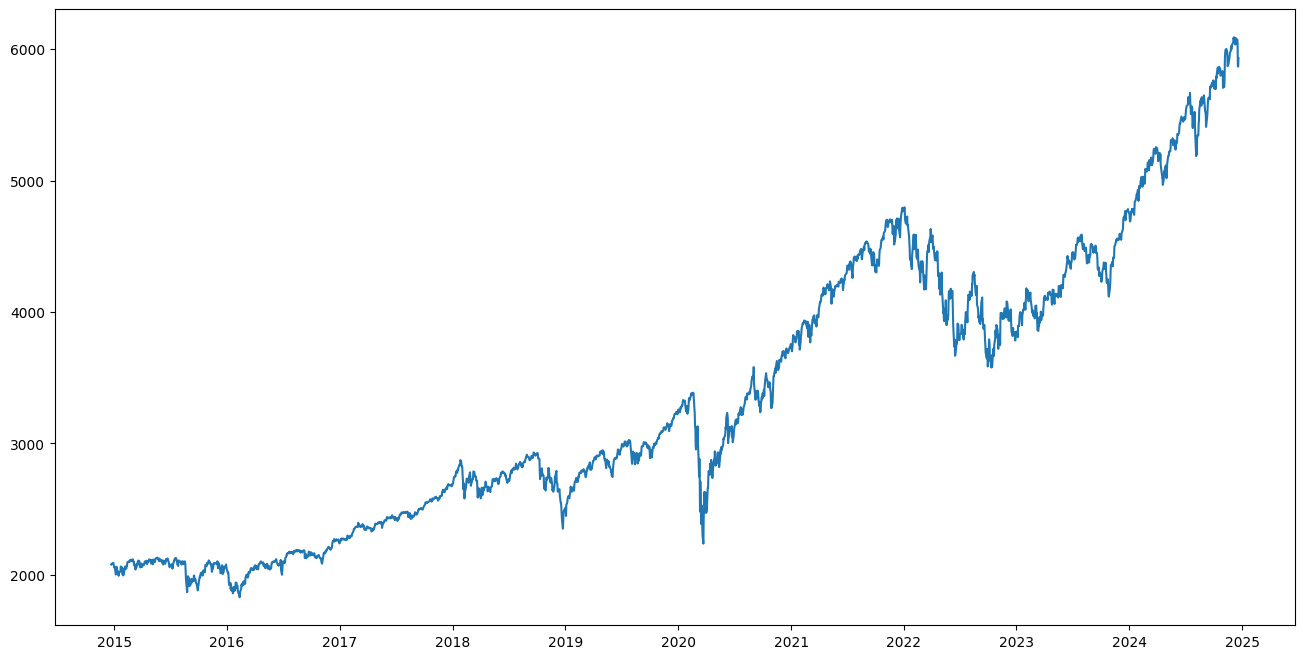

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.plot(f["S&P500"], label = "S&P500" )

계절성보기

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Price"], model = 'additive', period = 365)

Index(['Price'], dtype='object')

In [ ]:
시계열 데이터를 분석하는 과정에서 시간 흐름에 따라 변동이 크거나 일정하지 않을 경우 비정상성(Non-Stationarity)을 지니게 되고 이를 전처리 없이 머신러닝 알고리즘에 학습할 경우 단순 후행 예측, 성능 저하, 잘못된 추론 등의 문제를 야기시킬 수 있습니다
출처: https://today-1.tistory.com/56 [Better Than,:티스토리]
시계열 데이터에는 일반적으로 시간 순차성(Time Step)과 지연 값(Lag)이라는 고유한 2가지 특성이 존재합니다. 두 특성 모두 시간 축을 바탕으로 발생하며 시계열 문제를 머신러닝 모델로 접근하고 해결하기 위해 유용한 특성입니다. 첫 번째, 시간 순차성(Time Step)은 시간축에서 직접 추출 가능하며 시작부터 끝가지 일정 시간 간격으로 측정된 년, 월, 일, 시간 특성이 대표적입니다. 이는 관측값이 주기적 성질을 지니고 있을 때 유용한 특성입니다. 두 번째, 지연 값(Lag)은 관측값에 시간 차이로 발생되며 현재 관측값들은 이전 관측값들로 표현됩니다. 이는 관측값이 자기 상관(AutoCorrelation) 또는 계열 상관성(SerialCorrelation)을 지니고 있을 때 유용한 특성입니
출처: https://today-1.tistory.com/56 [Better Than,:티스토리]
자기 상관(AutoCorrelation)은 현재 관측값과 지연(Lag) 값들과의 관계에서 발생되는 대표적 요인 중 하나입니다. 해당 특성은 과거 관측된 값들이 미래 관측값에 영향을 지속적으로 미치기 때문에 관측값들의 관계를 우선적으로 파악하고 올바르게 처치해야 원하는 목적에 맞게 데이터를 활용할 수 있습니다. 관계성을 파악하기 위해 ACF/PACF 등을 사용하여 직관적으로 알아보거나 Durbin-Watson 검정을  통해 객관적으로 살펴볼 수 있습니다.

예제로 가져온 주식 종가 데이터를 ACF/PACF로 살펴보니 AR(1)의 특성을 보이고 있습니다. 금융 공학에서는 기하 브라운운동(GBM)을 가정하여 주식 종가 예측 모형을 진행하는데 AR(1)과 근본적으로는 유사하기 때문에 이를 바탕으로 모형을 변형하여 표현할 수 있습니다. 변형된 AR(1) 공식을 살펴보면 다음 주식 종가(t+1)는 현재 주식 종가(t) + 정보(t) + 잡음(t)으로 구성되어 있고 현재 주식 종가(t)를 좌변으로 옮기면 정보(t)와 잡음(t)을 살펴볼 수 있습니다.
출처: https://today-1.tistory.com/56 [Better Than,:티스토리]

In [ ]:
# 노이즈 제거 방법 : 단순 이동 평균
def SMA(df, col, window = 2):
  return df[col].rolling(window=window, min_periiods =1).mean() # min = 1: 결측치 없이 계산, 각 rolling window의 평균

In [ ]:
# 지수 이동 평균 : 최근 값 가증치
def EMA(df, col, span = 2):
  return df[col].ewm(span=span).mena()

stock['EMA(5)'] = EMA(stock, 'Close', 5)


In [ ]:
# 푸리에 변환
이 코드는 시계열 데이터에 Fast Fourier Transform (FFT) 을 적용하여 고주파수를 제거하고 저주파수 성분만 남긴 후, 다시 원래 시계열로 복원하는 방식입니다. 결과적으로 노이즈를 제거한 부드러운 시계열 곡선을 만드는 데 사용됩니다.
def FFT()

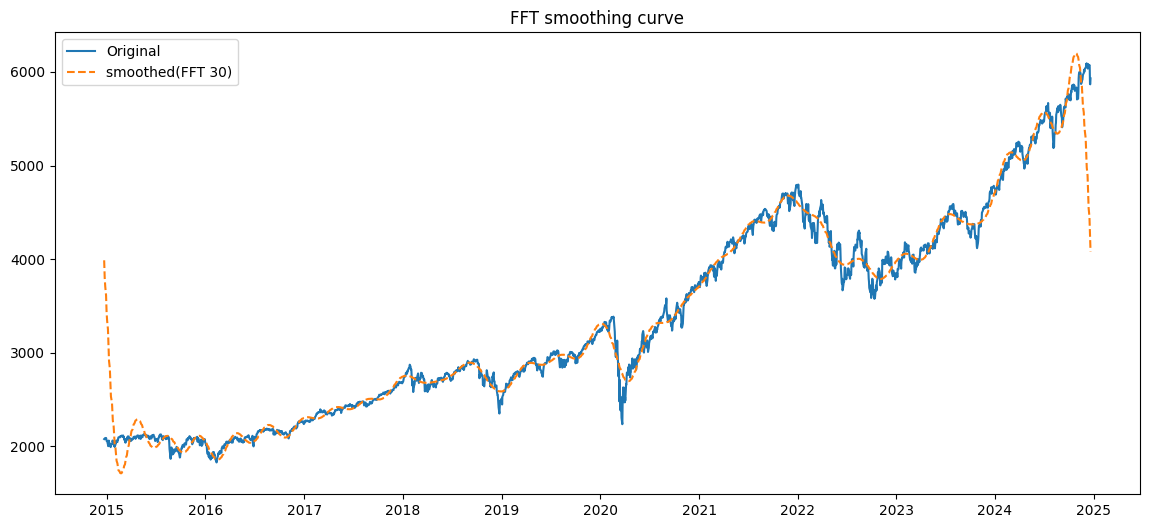

In [ ]:
def FFT(df, col, topn=2):
  fft = np.fft.fft(df[col]) # FFT :주파수 영역으로 변환
  fft[topn:-topn] = 0 # 고주파 제거
  ifft = np.fft.ifft(fft) # IFFT : 다시 시간영역
  return ifft

df["FFT(30)"] = FFT(df, 'Price', 30).real
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label = "Original")
plt.plot(df['FFT(30)'], label = "smoothed(FFT 30)", linestyle = '--')
plt.legend()
plt.title("FFT smoothing curve")
plt.show()

KeyError: 'FFT(30)'

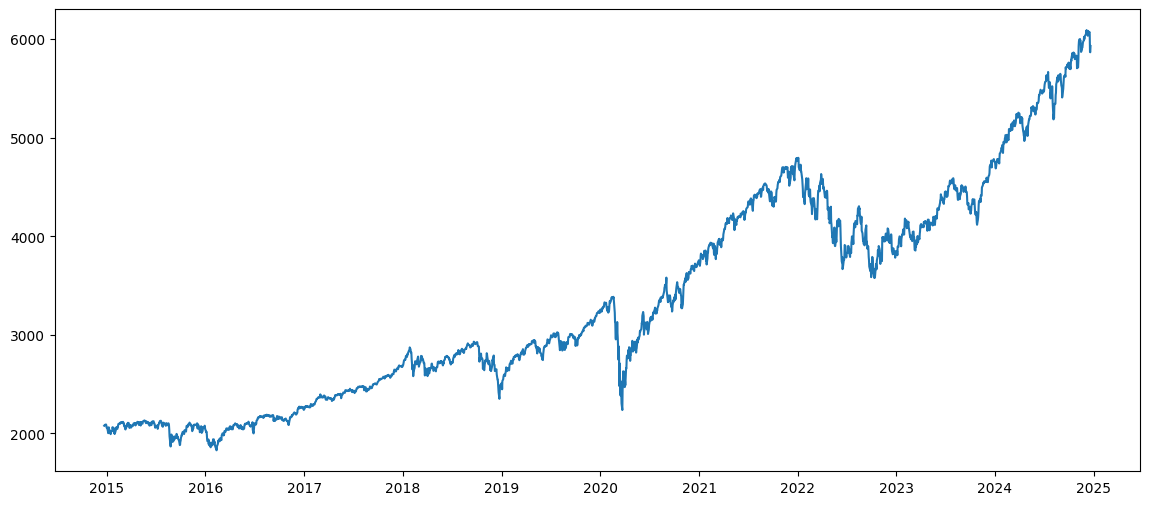

In [ ]:
# 시간-주파수 해상도가 뛰어나서 급격한 변화를
import pywt
!pip install PyWavelets
# WT
def WT(df, col, wavelet='db5', thresh=0.63):
  signal = df[col].values
  thresh = thresh*np.nanmax(signal)

  coeff =  pywt.wavedec(signal, wavelet = "db5" ,mode="per")
  coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft") for i in coeff[1:])
  reconstructured_signal = pywt.waverec(coeff, wavelet = "db5", mode = "per")
  return reconstructured_signal

df["WT"] = WT(df, 'Price')[:len(df)].real
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['S&P500'], label = "Original")
plt.plot(df['FFT(30)'], label = "smoothed(FFT 30)", linestyle = '--')
plt.plot(df['WT'], label = "smoothed(WT)", linestyle = '-')

plt.legend()
plt.title("FFT smoothing curve")
plt.show()


# 고주파의 빠른 변화를 줄여서 더 완만해짐


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
y_mm = mms.fit_transform(df["WT"].to_frame())



In [ ]:
df = df.rename(columns={"WT": "S&P 500WT"})

In [ ]:
feature_considered = ["S&P 500WT","Volume", "Close"]
features = pd.concat([df[feature_considered[0]], data_stocks[feature_considered[1:3]]])
features.index = df.index
features.head()

ValueError: Length mismatch: Expected axis has 1894053 elements, new values have 2517 elements